In [2]:
import deepxde as dde
from deepxde.backend import tf
import numpy as np
from time import time
import matplotlib.pyplot as plt
from matplotlib import cm


nu = 0.1

In [3]:
geom= dde.geometry.Interval(-1,1)
timedomain = dde.geometry.TimeDomain(0,1.00)
geotime = dde.geometry.GeometryXTime(geom,timedomain)

def pde(x,y):
    dy_x = dde.grad.jacobian(y,x,i=0,j=0)
    dy_t = dde.grad.jacobian(y,x,i=0,j=1)
    dy_xx = dde.grad.hessian(y,x,i=0,j=0)
    return dy_t + y*dy_x -(0.1)*dy_xx

bc = dde.icbc.DirichletBC(geotime,lambda x: 0, lambda _,on_boundary:on_boundary)
ic = dde.icbc.IC(geotime,lambda x:-np.sin(np.pi*x[:,0:1]),lambda _,on_initial:on_initial)

data = dde.data.TimePDE(geotime,pde,[bc,ic],num_domain=2540,num_boundary=80,num_initial=160)

net = dde.nn.FNN([2]+[50]*3 +[1],'tanh','Glorot normal')

model1 = dde.Model(data,net)
model1.compile("L-BFGS")
losshistory, train_state = model1.train()

Compiling model...
Building feed-forward neural network...
'build' took 0.099399 s



/home/diganta/anaconda3/envs/ML/lib/python3.8/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:103: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
2022-11-25 23:58:55.146987: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


'compile' took 0.547368 s

Initializing variables...
Training model...



2022-11-25 23:58:55.603366: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


Step      Train loss                        Test loss                         Test metric
0         [1.33e-02, 1.37e-01, 3.02e-01]    [1.33e-02, 1.37e-01, 3.02e-01]    []  
1000      [3.41e-05, 1.93e-06, 7.30e-06]                                          
2000      [8.49e-06, 4.16e-07, 2.12e-06]                                          
3000      [2.92e-06, 1.99e-07, 5.76e-07]                                          
INFO:tensorflow:Optimization terminated with:
  Message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  Objective function value: 0.000002
  Number of iterations: 3735
  Number of functions evaluations: 3897
3897      [1.48e-06, 8.35e-08, 4.90e-07]    [1.48e-06, 8.35e-08, 4.90e-07]    []  

Best model at step 3897:
  train loss: 2.05e-06
  test loss: 2.05e-06
  test metric: []

'train' took 128.997093 s



nu=0.01

In [4]:
geom= dde.geometry.Interval(-1,1)
timedomain = dde.geometry.TimeDomain(0,1.00)
geotime = dde.geometry.GeometryXTime(geom,timedomain)

def pde(x,y):
    dy_x = dde.grad.jacobian(y,x,i=0,j=0)
    dy_t = dde.grad.jacobian(y,x,i=0,j=1)
    dy_xx = dde.grad.hessian(y,x,i=0,j=0)
    return dy_t + y*dy_x -(0.01)*dy_xx

bc = dde.icbc.DirichletBC(geotime,lambda x: 0, lambda _,on_boundary:on_boundary)
ic = dde.icbc.IC(geotime,lambda x:-np.sin(np.pi*x[:,0:1]),lambda _,on_initial:on_initial)

data = dde.data.TimePDE(geotime,pde,[bc,ic],num_domain=2540,num_boundary=80,num_initial=160)

net = dde.nn.FNN([2]+[50]*3 +[1],'tanh','Glorot normal')

model2 = dde.Model(data,net)
model2.compile("L-BFGS")
losshistory, train_state = model2.train()

Compiling model...
Building feed-forward neural network...
'build' took 0.083854 s

'compile' took 0.465696 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [1.23e-02, 4.27e-02, 3.83e-01]    [1.23e-02, 4.27e-02, 3.83e-01]    []  
1000      [6.57e-04, 8.62e-06, 1.62e-04]                                          
2000      [7.44e-05, 2.42e-07, 9.49e-06]                                          
3000      [2.26e-05, 2.13e-07, 1.92e-06]                                          
4000      [1.08e-05, 7.68e-08, 7.14e-07]                                          
5000      [5.42e-06, 4.96e-08, 5.09e-07]                                          
INFO:tensorflow:Optimization terminated with:
  Message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  Objective function value: 0.000004
  Number of iterations: 5020
  Number of functions evaluations: 5465
5465      [4.03e-06, 3.20e-08, 4.36e-07]    [

nu = 0.001

In [12]:

geom= dde.geometry.Interval(-1,1)
timedomain = dde.geometry.TimeDomain(0,1.00)
geotime = dde.geometry.GeometryXTime(geom,timedomain)

def pde(x,y):
    dy_x = dde.grad.jacobian(y,x,i=0,j=0)
    dy_t = dde.grad.jacobian(y,x,i=0,j=1)
    dy_xx = dde.grad.hessian(y,x,i=0,j=0)
    return dy_t + y*dy_x -(0.001)*dy_xx

bc = dde.icbc.DirichletBC(geotime,lambda x: 0, lambda _,on_boundary:on_boundary)
ic = dde.icbc.IC(geotime,lambda x:-np.sin(np.pi*x[:,0:1]),lambda _,on_initial:on_initial)

data = dde.data.TimePDE(geotime,pde,[bc,ic],num_domain=2540,num_boundary=80,num_initial=160)

net = dde.nn.FNN([2]+[50]*3 +[1],'tanh','Glorot normal')

model3 = dde.Model(data,net)
model3.compile("adam",lr=0.001)
model3.train(20000)
model3.compile("L-BFGS")
model3.train()

Compiling model...
Building feed-forward neural network...
'build' took 0.103933 s



/home/diganta/anaconda3/envs/ML/lib/python3.8/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:103: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.714969 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [4.31e-03, 3.34e-02, 3.90e-01]    [4.31e-03, 3.34e-02, 3.90e-01]    []  
1000      [3.60e-02, 1.30e-04, 5.30e-02]    [3.60e-02, 1.30e-04, 5.30e-02]    []  
2000      [3.03e-02, 8.09e-06, 4.94e-02]    [3.03e-02, 8.09e-06, 4.94e-02]    []  
3000      [2.90e-02, 3.00e-04, 4.56e-02]    [2.90e-02, 3.00e-04, 4.56e-02]    []  
4000      [2.40e-02, 2.88e-05, 3.71e-02]    [2.40e-02, 2.88e-05, 3.71e-02]    []  
5000      [1.89e-02, 1.05e-05, 3.08e-02]    [1.89e-02, 1.05e-05, 3.08e-02]    []  
6000      [1.55e-02, 2.57e-06, 2.69e-02]    [1.55e-02, 2.57e-06, 2.69e-02]    []  
7000      [1.50e-02, 2.10e-05, 2.50e-02]    [1.50e-02, 2.10e-05, 2.50e-02]    []  
8000      [1.51e-02, 1.08e-05, 2.63e-02]    [1.51e-02, 1.08e-05, 2.63e-02]    []  
9000      [1.35e-02, 4.12e-06, 2.43e-02]    [1.35e-02, 4.12e-06, 2.43e-02]    []  
10000   

(<deepxde.model.LossHistory at 0x7fb9e1fec7c0>,
 <deepxde.model.TrainState at 0x7fb9ba4b7340>)

nu = 0.00001

In [11]:
geom= dde.geometry.Interval(-1,1)
timedomain = dde.geometry.TimeDomain(0,1.00)
geotime = dde.geometry.GeometryXTime(geom,timedomain)

def pde(x,y):
    dy_x = dde.grad.jacobian(y,x,i=0,j=0)
    dy_t = dde.grad.jacobian(y,x,i=0,j=1)
    dy_xx = dde.grad.hessian(y,x,i=0,j=0)
    return dy_t + y*dy_x -(0.00001)*dy_xx

bc = dde.icbc.DirichletBC(geotime,lambda x: 0, lambda _,on_boundary:on_boundary)
ic = dde.icbc.IC(geotime,lambda x:-np.sin(np.pi*x[:,0:1]),lambda _,on_initial:on_initial)

data = dde.data.TimePDE(geotime,pde,[bc,ic],num_domain=2540,num_boundary=80,num_initial=160)

net = dde.nn.FNN([2]+[50]*3 +[1],'tanh','Glorot normal')

model4 = dde.Model(data,net)
model4.compile("adam",lr=0.001)
model4.train(20000)
model4.compile("L-BFGS")
model4.train()

Compiling model...
Building feed-forward neural network...
'build' took 0.107887 s



/home/diganta/anaconda3/envs/ML/lib/python3.8/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:103: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.794765 s

Initializing variables...
Training model...

Step      Train loss                        Test loss                         Test metric
0         [3.78e-02, 6.23e-02, 3.53e-01]    [3.78e-02, 6.23e-02, 3.53e-01]    []  
1000      [3.83e-02, 8.28e-04, 6.06e-02]    [3.83e-02, 8.28e-04, 6.06e-02]    []  
2000      [3.11e-02, 1.52e-04, 5.35e-02]    [3.11e-02, 1.52e-04, 5.35e-02]    []  
3000      [2.93e-02, 4.59e-05, 5.23e-02]    [2.93e-02, 4.59e-05, 5.23e-02]    []  
4000      [2.89e-02, 1.82e-04, 5.29e-02]    [2.89e-02, 1.82e-04, 5.29e-02]    []  
5000      [2.84e-02, 4.26e-05, 5.02e-02]    [2.84e-02, 4.26e-05, 5.02e-02]    []  
6000      [2.75e-02, 2.13e-05, 5.02e-02]    [2.75e-02, 2.13e-05, 5.02e-02]    []  
7000      [2.73e-02, 1.33e-05, 4.96e-02]    [2.73e-02, 1.33e-05, 4.96e-02]    []  
8000      [2.66e-02, 7.66e-06, 4.91e-02]    [2.66e-02, 7.66e-06, 4.91e-02]    []  
9000      [2.61e-02, 6.38e-06, 4.90e-02]    [2.61e-02, 6.38e-06, 4.90e-02]    []  
10000   

(<deepxde.model.LossHistory at 0x7fb9ba4ca4c0>,
 <deepxde.model.TrainState at 0x7fb9ba4acc40>)

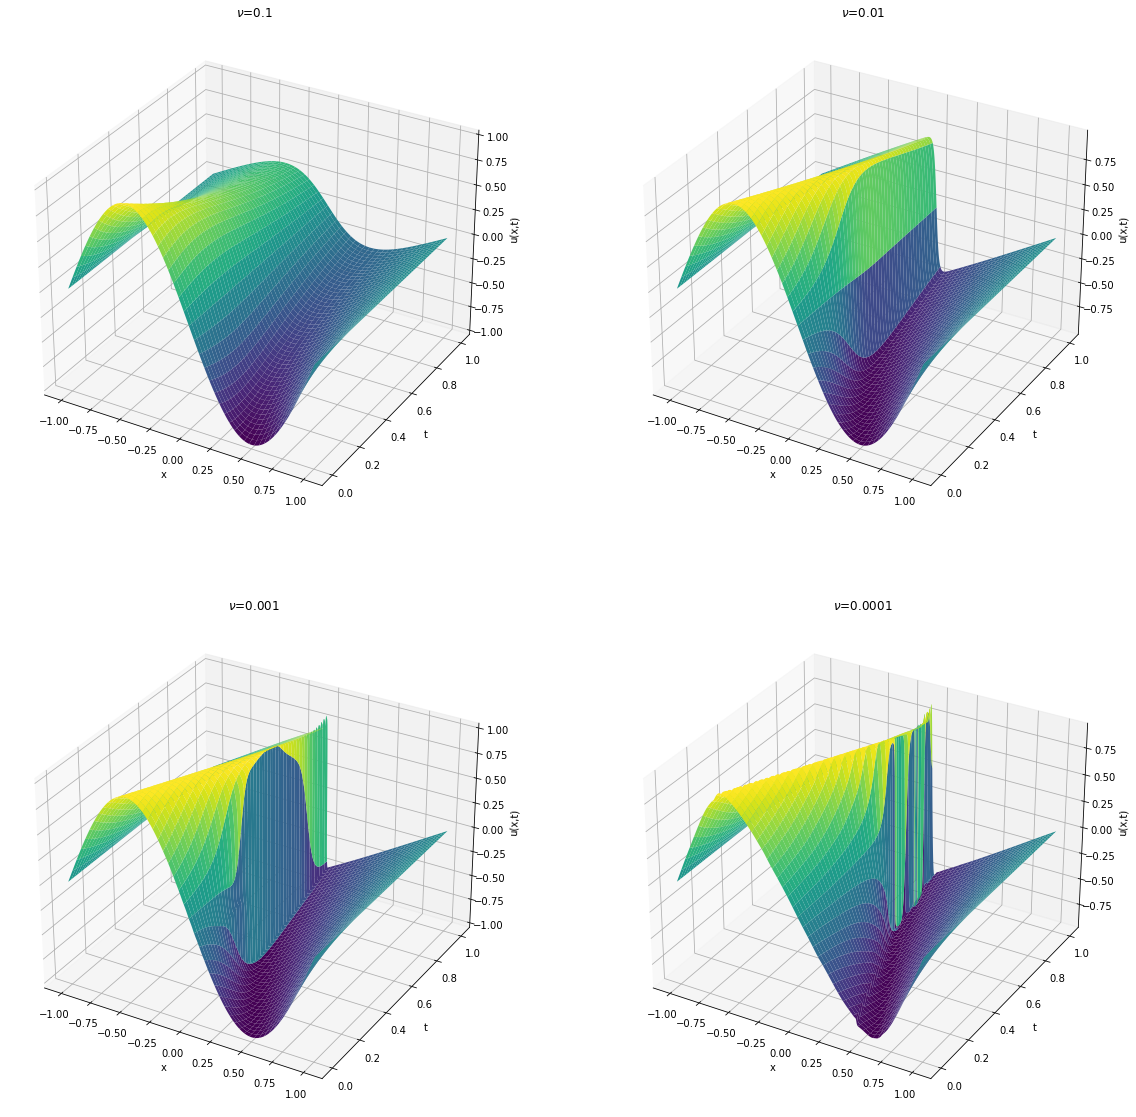

In [13]:
t=np.linspace(0.0,1.0,1000)
x=np.linspace(-1.0,1.0,1000)
xx, tt = np.meshgrid(x, t)
#X = np.vstack((np.ravel(xx), np.ravel(tt))).T
#y_pred = model.predict(X)
#f = model.predict(X)
X=np.concatenate([xx.reshape(1000,1000,1),tt.reshape(1000,1000,1)],axis=2)
fig, ax = plt.subplots(nrows=2,ncols=2,subplot_kw={"projection": "3d"},figsize=(20,20))
f1 = model1.predict(X.reshape((1000000,2)))
sur=ax[0,0].plot_surface(xx,tt,f1.reshape(1000,1000),cmap=cm.viridis)
#fig.colorbar(sur,aspect=5)
ax[0,0].set_xlabel("x")
ax[0,0].set_ylabel("t")
ax[0,0].set_zlabel("u(x,t)")
ax[0,0].set_title(r"$\nu$=0.1")

f2 = model2.predict(X.reshape((1000000,2)))
sur=ax[0,1].plot_surface(xx,tt,f2.reshape(1000,1000),cmap=cm.viridis)
#fig.colorbar(sur,aspect=5)
ax[0,1].set_xlabel("x")
ax[0,1].set_ylabel("t")
ax[0,1].set_zlabel("u(x,t)")
ax[0,1].set_title(r"$\nu$=0.01")

f3 = model3.predict(X.reshape((1000000,2)))
sur=ax[1,0].plot_surface(xx,tt,f3.reshape(1000,1000),cmap=cm.viridis)
#fig.colorbar(sur,aspect=5)
ax[1,0].set_xlabel("x")
ax[1,0].set_ylabel("t")
ax[1,0].set_zlabel("u(x,t)")
ax[1,0].set_title(r"$\nu$=0.001")

f4 = model4.predict(X.reshape((1000000,2)))
sur=ax[1,1].plot_surface(xx,tt,f4.reshape(1000,1000),cmap=cm.viridis)
#fig.colorbar(sur,aspect=5)
ax[1,1].set_xlabel("x")
ax[1,1].set_ylabel("t")
ax[1,1].set_zlabel("u(x,t)")
ax[1,1].set_title(r"$\nu$=0.0001")
plt.show()

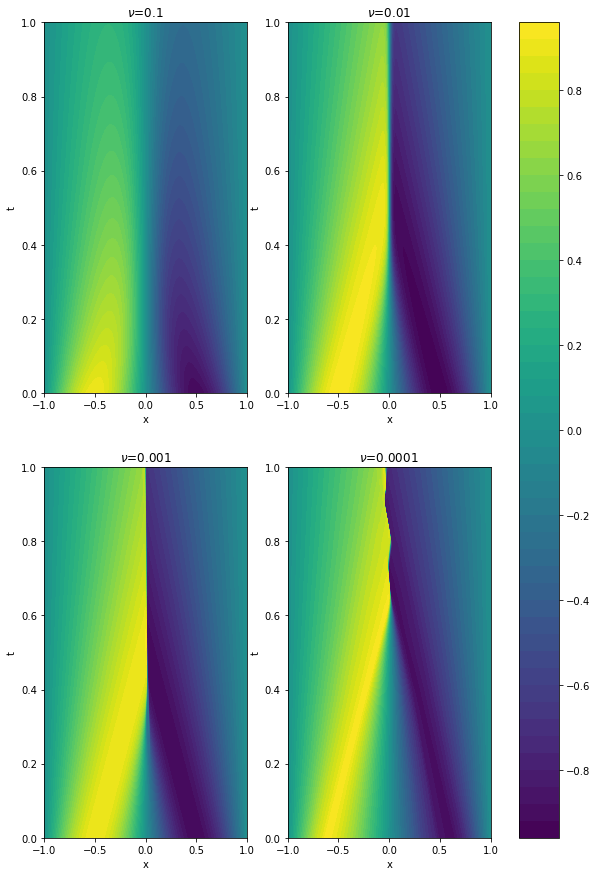

In [14]:
fig,ax = plt.subplots(2,2,figsize=(10,15))
s=ax[0,0].contourf(xx,tt,f1.reshape(1000,1000),50)
#fig.colorbar(sur,aspect=5)
ax[0,0].set_xlabel("x")
ax[0,0].set_ylabel("t")
ax[0,0].set_title(r"$\nu$=0.1")

s=ax[0,1].contourf(xx,tt,f2.reshape(1000,1000),50)
#fig.colorbar(sur,aspect=5)
ax[0,1].set_xlabel("x")
ax[0,1].set_ylabel("t")
ax[0,1].set_title(r"$\nu$=0.01")

s=ax[1,0].contourf(xx,tt,f3.reshape(1000,1000),50)
#fig.colorbar(sur,aspect=5)
ax[1,0].set_xlabel("x")
ax[1,0].set_ylabel("t")
ax[1,0].set_title(r"$\nu$=0.001")

s=ax[1,1].contourf(xx,tt,f4.reshape(1000,1000),50)
#fig.colorbar(sur,aspect=5)
ax[1,1].set_xlabel("x")
ax[1,1].set_ylabel("t")
ax[1,1].set_title(r"$\nu$=0.0001")
fig.colorbar(s, ax=ax.ravel().tolist())